In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
# from tensorflow import keras as keras 
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

1.15.0
2.3.1


Using TensorFlow backend.


# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
```
* 
```python
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
```
* 
```python
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:




dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


(15060, 41)

# SGD

In [4]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [5]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])


Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.5037 - accuracy: 0.7629 - val_loss: 0.3702 - val_accuracy: 0.8309
Epoch 2/100
30162/30162 [==============================] - 1s 40us/step - loss: 0.3468 - accuracy: 0.8370 - val_loss: 0.3417 - val_accuracy: 0.8375
Epoch 3/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3359 - accuracy: 0.8420 - val_loss: 0.3336 - val_accuracy: 0.8444
Epoch 4/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3317 - accuracy: 0.8447 - val_loss: 0.3333 - val_accuracy: 0.8436
Epoch 5/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3296 - accuracy: 0.8442 - val_loss: 0.3286 - val_accuracy: 0.8462
Epoch 6/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.3283 - accuracy: 0.8463 - val_loss: 0.3282 - val_accuracy: 0.8475
Epoch 7/100
30162/30162 [==============================] - 2s

30162/30162 [==============================] - 1s 40us/step - loss: 0.3042 - accuracy: 0.8578 - val_loss: 0.3203 - val_accuracy: 0.8497
Epoch 55/100
30162/30162 [==============================] - 1s 40us/step - loss: 0.3037 - accuracy: 0.8579 - val_loss: 0.3204 - val_accuracy: 0.8501
Epoch 56/100
30162/30162 [==============================] - 1s 37us/step - loss: 0.3036 - accuracy: 0.8578 - val_loss: 0.3199 - val_accuracy: 0.8501
Epoch 57/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3031 - accuracy: 0.8570 - val_loss: 0.3205 - val_accuracy: 0.8500
Epoch 58/100
30162/30162 [==============================] - 1s 35us/step - loss: 0.3025 - accuracy: 0.8588 - val_loss: 0.3204 - val_accuracy: 0.8510
Epoch 59/100
30162/30162 [==============================] - 1s 36us/step - loss: 0.3030 - accuracy: 0.8568 - val_loss: 0.3204 - val_accuracy: 0.8483
Epoch 60/100
30162/30162 [==============================] - 1s 36us/step - loss: 0.3026 - accuracy: 0.8580 - val_loss: 

In [7]:
history_sgd.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

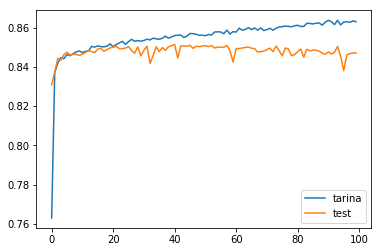

In [8]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

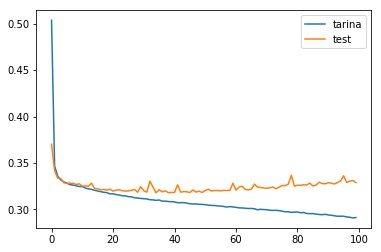

In [9]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# RMSprop

In [10]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_RMSprop = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(loss="binary_crossentropy",optimizer=RMSprop, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_RMSprop])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3826 - accuracy: 0.8250 - val_loss: 0.3493 - val_accuracy: 0.8430
Epoch 2/100
30162/30162 [===========================

30162/30162 [==============================] - 1s 39us/step - loss: 0.3021 - accuracy: 0.8618 - val_loss: 0.3247 - val_accuracy: 0.8505
Epoch 50/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3023 - accuracy: 0.8623 - val_loss: 0.3272 - val_accuracy: 0.8493
Epoch 51/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3018 - accuracy: 0.8623 - val_loss: 0.3267 - val_accuracy: 0.8517
Epoch 52/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3015 - accuracy: 0.8640 - val_loss: 0.3268 - val_accuracy: 0.8522
Epoch 53/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3013 - accuracy: 0.8628 - val_loss: 0.3256 - val_accuracy: 0.8517
Epoch 54/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3009 - accuracy: 0.8629 - val_loss: 0.3303 - val_accuracy: 0.8525
Epoch 55/100
30162/30162 [==============================] - 1s 39us/step - loss: 0.3011 - accuracy: 0.8629 - val_loss: 

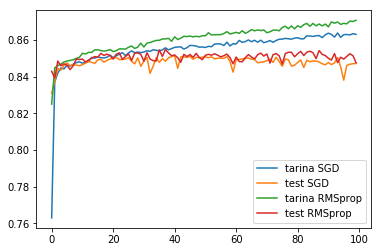

In [11]:
import matplotlib.pyplot as plt
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.legend()
plt.show()

# Adagrad

In [12]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_Adagrad = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(loss="binary_crossentropy",optimizer=Adagrad, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adagrad])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.3757 - accuracy: 0.8313 - val_loss: 0.3495 - val_accuracy: 0.8430
Epoch 2/100
30162/30162 [===========================

Epoch 50/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3179 - accuracy: 0.8515 - val_loss: 0.3231 - val_accuracy: 0.8496
Epoch 51/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3178 - accuracy: 0.8514 - val_loss: 0.3229 - val_accuracy: 0.8493
Epoch 52/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3178 - accuracy: 0.8515 - val_loss: 0.3229 - val_accuracy: 0.8500
Epoch 53/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3176 - accuracy: 0.8511 - val_loss: 0.3229 - val_accuracy: 0.8492
Epoch 54/100
30162/30162 [==============================] - 1s 37us/step - loss: 0.3176 - accuracy: 0.8514 - val_loss: 0.3228 - val_accuracy: 0.8491
Epoch 55/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3175 - accuracy: 0.8513 - val_loss: 0.3228 - val_accuracy: 0.8495
Epoch 56/100
30162/30162 [==============================] - 1s 38us/step - loss: 0.3174 - accuracy: 0.8510

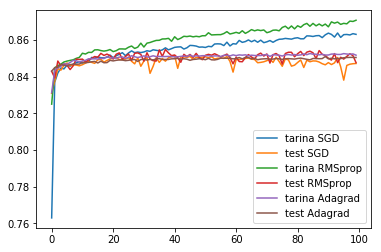

In [13]:
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
plt.legend()
plt.show()

# Adadelta

In [14]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_Adadelta = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss="binary_crossentropy",optimizer=Adadelta, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adadelta])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3935 - accuracy: 0.8111 - val_loss: 0.3464 - val_accuracy: 0.8404
Epoch 2/100
30162/30162 [===========================

Epoch 50/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.3003 - accuracy: 0.8611 - val_loss: 0.3206 - val_accuracy: 0.8502
Epoch 51/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.2999 - accuracy: 0.8608 - val_loss: 0.3226 - val_accuracy: 0.8479
Epoch 52/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.2993 - accuracy: 0.8616 - val_loss: 0.3209 - val_accuracy: 0.8510
Epoch 53/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.2987 - accuracy: 0.8606 - val_loss: 0.3260 - val_accuracy: 0.8501
Epoch 54/100
30162/30162 [==============================] - 1s 41us/step - loss: 0.2985 - accuracy: 0.8609 - val_loss: 0.3209 - val_accuracy: 0.8499
Epoch 55/100
30162/30162 [==============================] - 1s 41us/step - loss: 0.2981 - accuracy: 0.8600 - val_loss: 0.3242 - val_accuracy: 0.8513
Epoch 56/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.2973 - accuracy: 0.8613

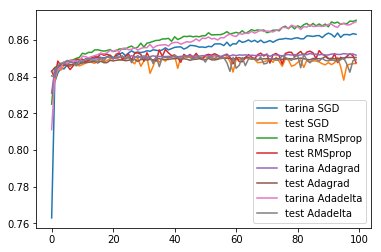

In [15]:
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
plt.plot(history_Adadelta.history['accuracy'], label = "tarina Adadelta")
plt.plot(history_Adadelta.history['val_accuracy'], label = "test Adadelta")
plt.legend()
plt.show()

# Adam

In [16]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_Adam = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adam])



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 55us/step - loss: 0.4216 - accuracy: 0.8056 - val_loss: 0.3501 - val_accuracy: 0.8410
Epoch 2/100
30162/30162 [===========================

30162/30162 [==============================] - 1s 44us/step - loss: 0.2752 - accuracy: 0.8692 - val_loss: 0.3403 - val_accuracy: 0.8487
Epoch 50/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.2743 - accuracy: 0.8709 - val_loss: 0.3404 - val_accuracy: 0.8503
Epoch 51/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.2741 - accuracy: 0.8705 - val_loss: 0.3399 - val_accuracy: 0.8486
Epoch 52/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.2733 - accuracy: 0.8704 - val_loss: 0.3458 - val_accuracy: 0.8495
Epoch 53/100
30162/30162 [==============================] - 1s 42us/step - loss: 0.2732 - accuracy: 0.8714 - val_loss: 0.3417 - val_accuracy: 0.8486
Epoch 54/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.2718 - accuracy: 0.8705 - val_loss: 0.3432 - val_accuracy: 0.8472
Epoch 55/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.2713 - accuracy: 0.8716 - val_loss: 

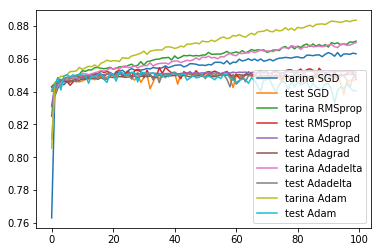

In [17]:
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
plt.plot(history_Adadelta.history['accuracy'], label = "tarina Adadelta")
plt.plot(history_Adadelta.history['val_accuracy'], label = "test Adadelta")
plt.plot(history_Adam.history['accuracy'], label = "tarina Adam")
plt.plot(history_Adam.history['val_accuracy'], label = "test Adam")
plt.legend()
plt.show()

# learning rate

In [18]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_Adam_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_Adam_1])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 52us/step - loss: 0.5927 - accuracy: 0.6934 - val_loss: 0.5284 - val_accuracy: 0.7543
Epoch 2/100
30162/30162 [===========================

30162/30162 [==============================] - 1s 49us/step - loss: 0.3185 - accuracy: 0.8506 - val_loss: 0.3230 - val_accuracy: 0.8488
Epoch 50/100
30162/30162 [==============================] - 1s 49us/step - loss: 0.3185 - accuracy: 0.8511 - val_loss: 0.3228 - val_accuracy: 0.8495
Epoch 51/100
30162/30162 [==============================] - 1s 50us/step - loss: 0.3182 - accuracy: 0.8518 - val_loss: 0.3228 - val_accuracy: 0.8493
Epoch 52/100
30162/30162 [==============================] - 2s 54us/step - loss: 0.3180 - accuracy: 0.8507 - val_loss: 0.3227 - val_accuracy: 0.8493
Epoch 53/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.3180 - accuracy: 0.8514 - val_loss: 0.3226 - val_accuracy: 0.8498
Epoch 54/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.3177 - accuracy: 0.8517 - val_loss: 0.3223 - val_accuracy: 0.8499
Epoch 55/100
30162/30162 [==============================] - 1s 43us/step - loss: 0.3176 - accuracy: 0.8519 - val_loss: 

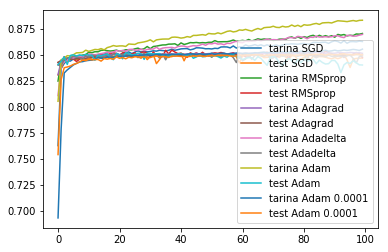

In [19]:
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
plt.plot(history_Adadelta.history['accuracy'], label = "tarina Adadelta")
plt.plot(history_Adadelta.history['val_accuracy'], label = "test Adadelta")
plt.plot(history_Adam.history['accuracy'], label = "tarina Adam")
plt.plot(history_Adam.history['val_accuracy'], label = "test Adam")

plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.0001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.0001")
plt.legend()
plt.show()

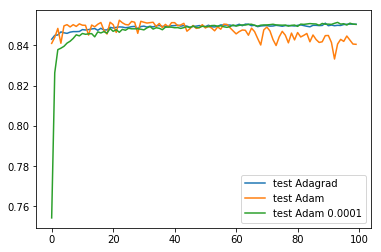

In [21]:
# # plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
# plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
# # plt.plot(history_RMSprop.history['accuracy'], label = "tarina RMSprop")
# plt.plot(history_RMSprop.history['val_accuracy'], label = "test RMSprop")
# plt.plot(history_Adagrad.history['accuracy'], label = "tarina Adagrad")
plt.plot(history_Adagrad.history['val_accuracy'], label = "test Adagrad")
# # plt.plot(history_Adadelta.history['accuracy'], label = "tarina Adadelta")
# plt.plot(history_Adadelta.history['val_accuracy'], label = "test Adadelta")
# plt.plot(history_Adam.history['accuracy'], label = "tarina Adam")
plt.plot(history_Adam.history['val_accuracy'], label = "test Adam")

# plt.plot(history_Adam_1.history['accuracy'], label = "tarina Adam 0.001")
plt.plot(history_Adam_1.history['val_accuracy'], label = "test Adam 0.0001")
plt.legend()
plt.show()